<a href="https://colab.research.google.com/github/zhihaohong52/bc3415/blob/main/german_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BC3415/german_credit.csv')

In [ ]:
df

,Creditability,Account Balance,Duration of Credit Mths,Payment Status of Previous Credit,Purpose,Credit Amount,Value of Savings and Stocks,Length of current employment,Instalment per cent,Sex and Marital Status,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [ ]:
df.isnull().sum()

,0
Creditability,0
Account Balance,0
Duration of Credit Mths,0
Payment Status of Previous Credit,0
Purpose,0
Credit Amount,0
Value of Savings and Stocks,0
Length of current employment,0
Instalment per cent,0
Sex and Marital Status,0


In [ ]:
df = pd.get_dummies(df, columns=["Payment Status of Previous Credit", "Purpose", "Most valuable available asset", "Occupation", "Telephone", "Foreign Worker", "Sex and Marital Status", "Account Balance"])

array([[<Axes: title={'center': 'Creditability'}>,
        <Axes: title={'center': 'Duration of Credit Mths'}>,
        <Axes: title={'center': 'Credit Amount'}>,
        <Axes: title={'center': 'Value of Savings and Stocks'}>],
       [<Axes: title={'center': 'Length of current employment'}>,
        <Axes: title={'center': 'Instalment per cent'}>,
        <Axes: title={'center': 'Guarantors'}>,
        <Axes: title={'center': 'Duration in Current address'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Concurrent Credits'}>,
        <Axes: title={'center': 'Type of apartment'}>,
        <Axes: title={'center': 'No of Credits at this Bank'}>],
       [<Axes: title={'center': 'No of dependents'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

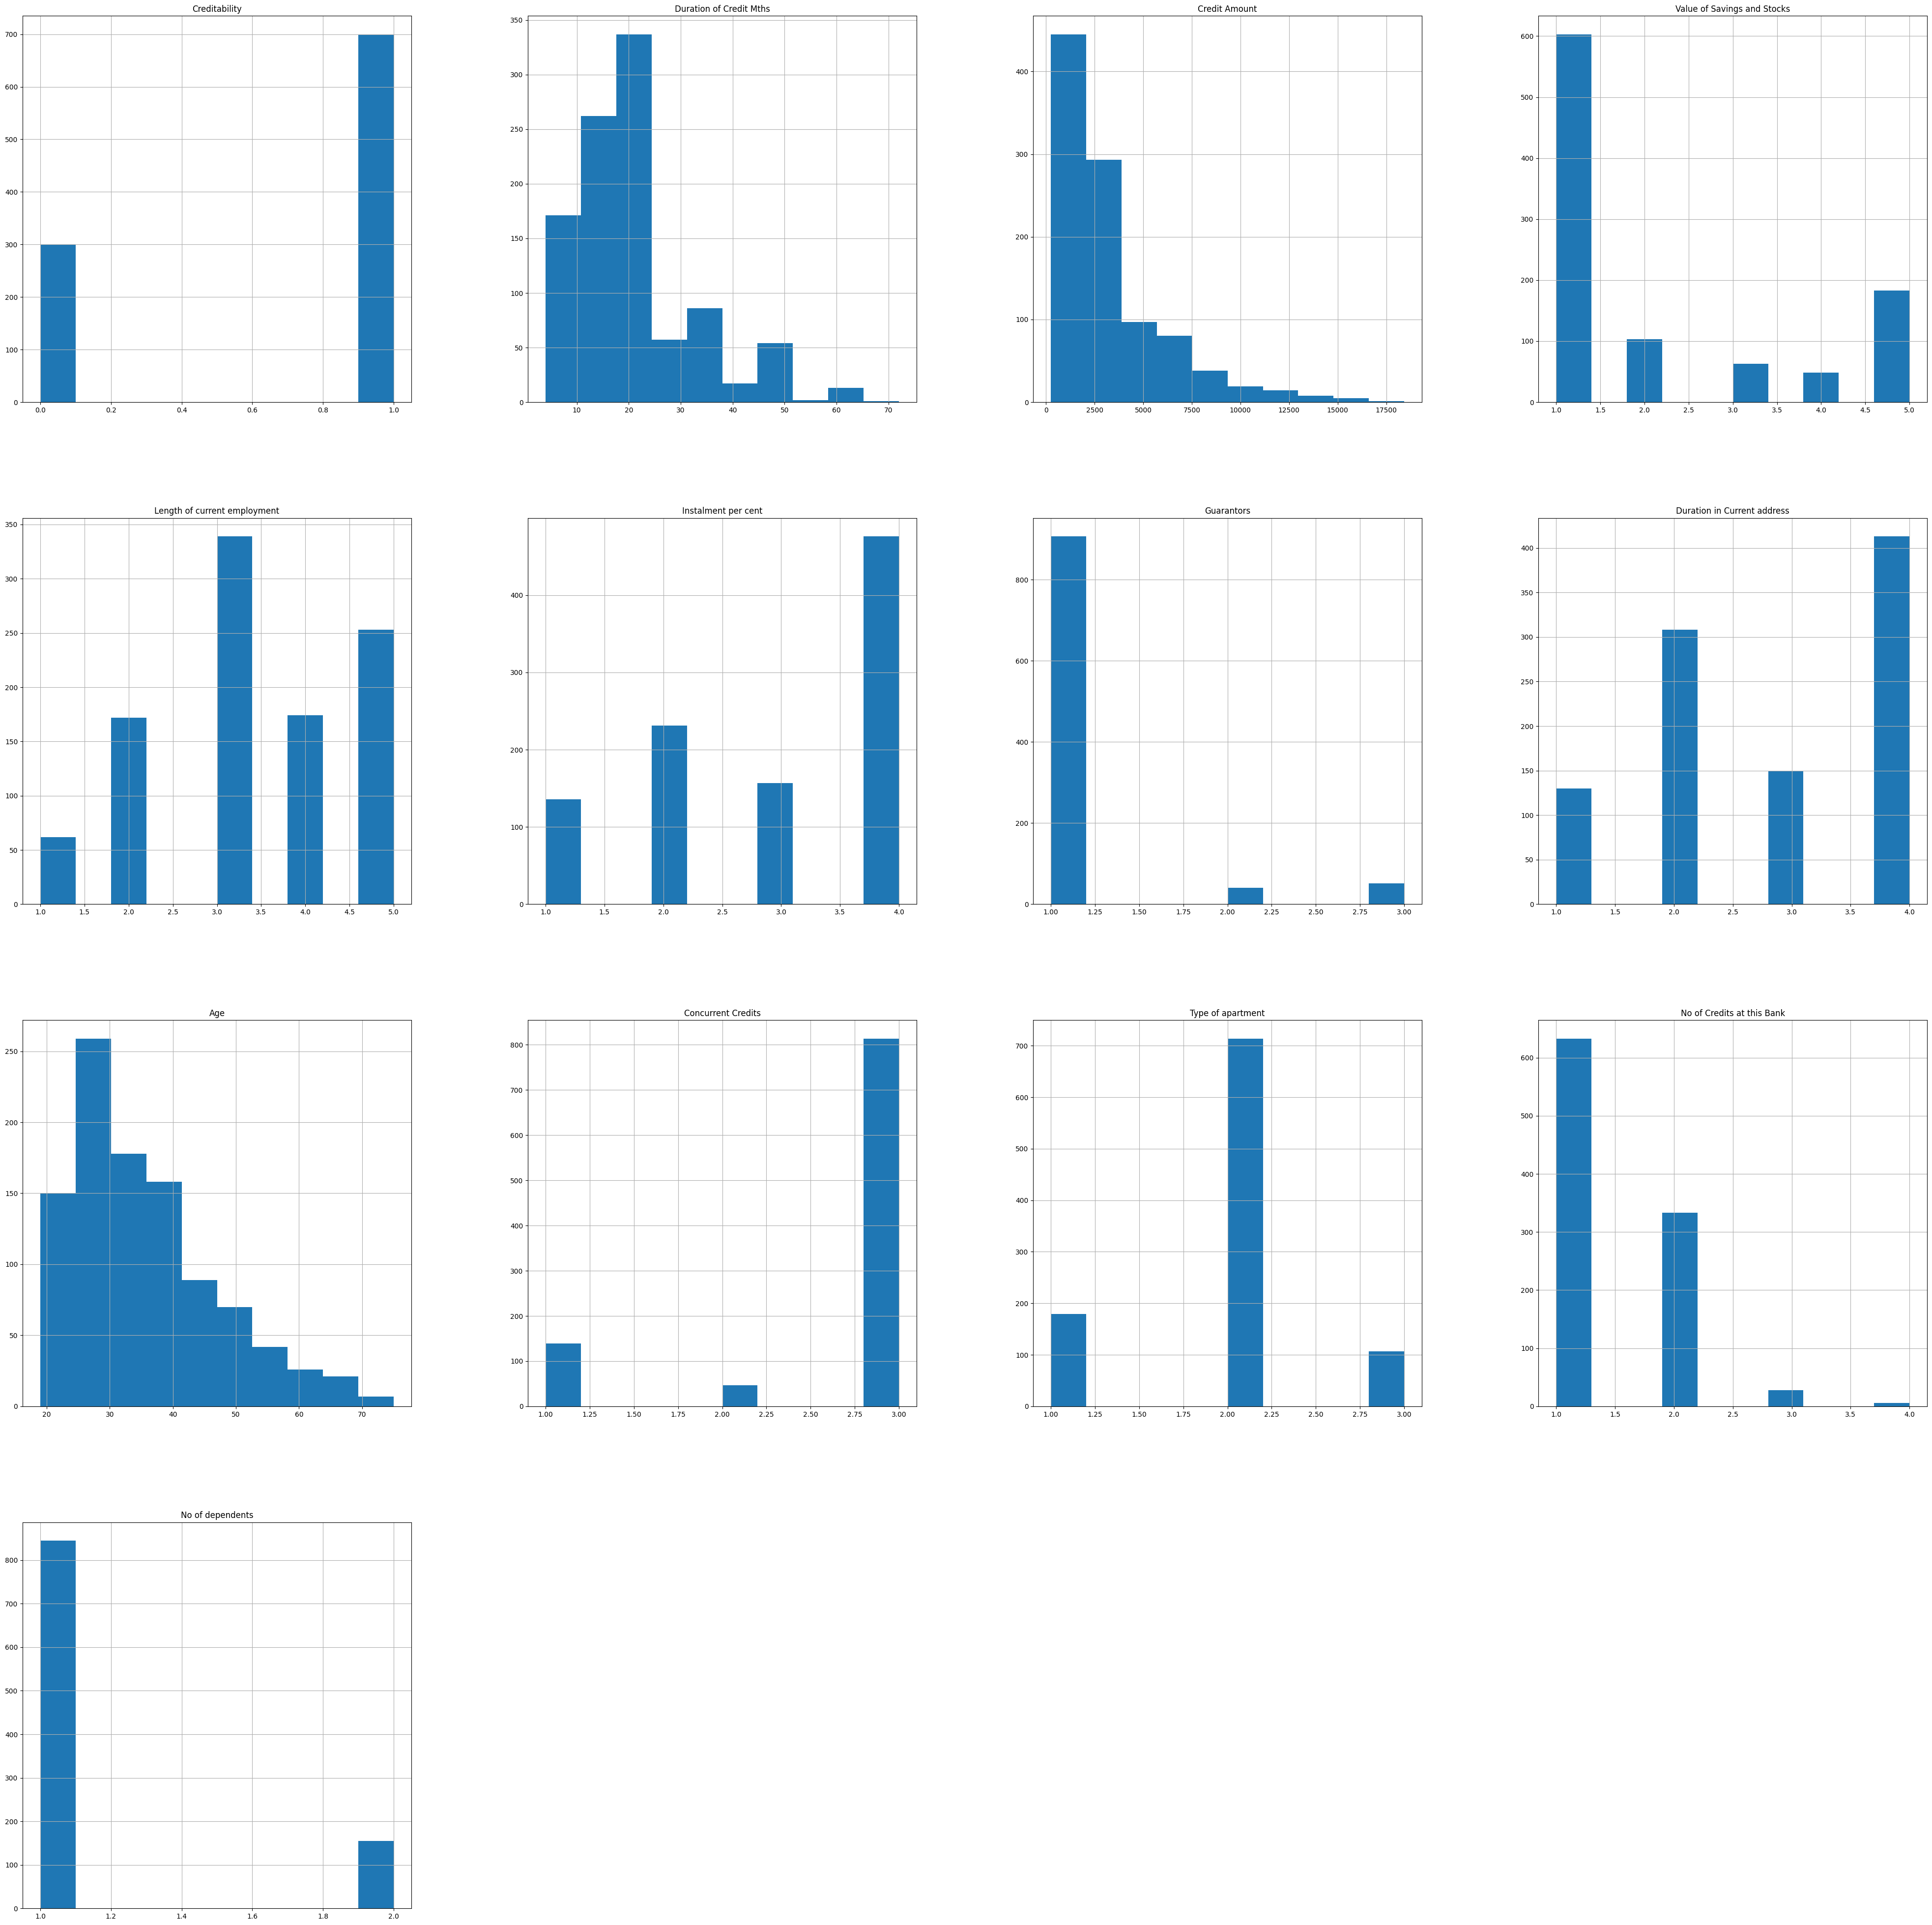

In [ ]:
df.hist(figsize=(50, 50))

In [ ]:
import seaborn as sns

<Axes: >

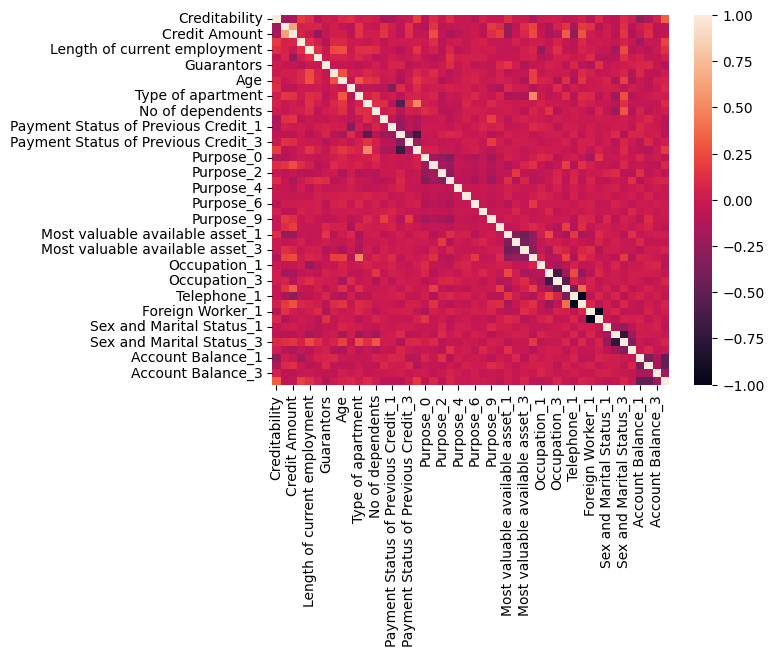

In [ ]:
sns.heatmap(df.corr())

<Axes: ylabel='Credit Amount'>

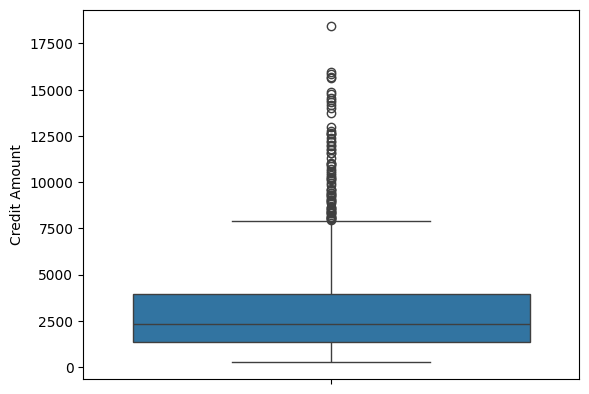

In [ ]:
sns.boxplot(data=df["Credit Amount"])

<Axes: xlabel='Creditability', ylabel='count'>

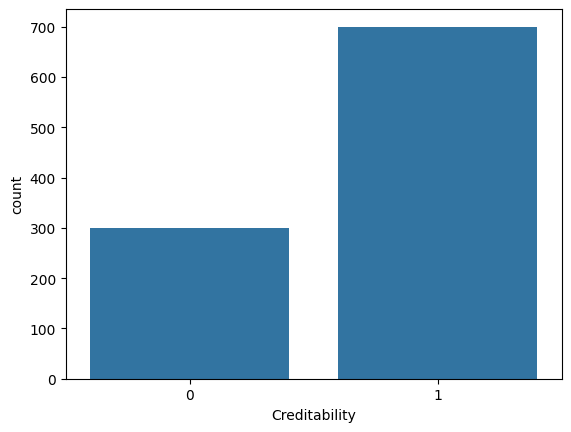

In [ ]:
sns.countplot(df, x="Creditability")

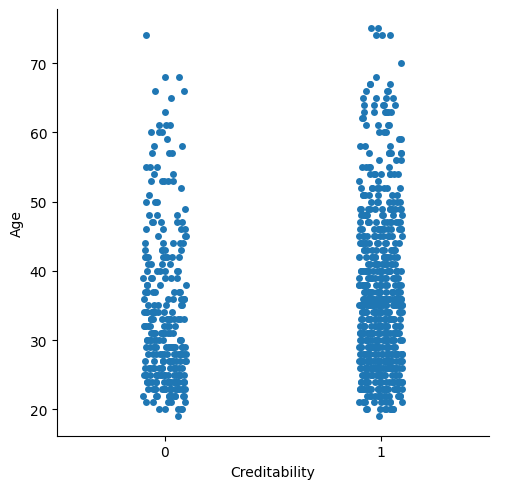

In [ ]:
sns.catplot(df, x="Creditability", y="Age")

In [ ]:
X = df.drop("Creditability", axis=1)
y = df["Creditability"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from scipy import stats

In [ ]:
X_train["Credit Amount"] = stats.zscore(X_train["Credit Amount"])
X_test["Credit Amount"] = stats.zscore(X_test["Credit Amount"])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import linear_model, tree, ensemble, neural_network

In [ ]:
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.728
[[ 41  38]
 [ 30 141]]


In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.724
[[ 38  41]
 [ 28 143]]


In [ ]:
model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.744
[[ 34  45]
 [ 19 152]]


In [ ]:
model = ensemble.GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.736
[[ 33  46]
 [ 20 151]]


In [ ]:
model = neural_network.MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.736
[[ 45  34]
 [ 32 139]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
